In [68]:
# Dependencies
import pandas as pd
from pathlib import Path
import time
# Used for interactive mapping 
import geopandas
import folium

In [69]:
# Name of the Cleaned Station CSV file and read it in
US_stations_df = pd.read_csv('Resources/Cleaned_all_US_fuel_stations_1-28-RM.csv', encoding= 'ISO-8859-1')

In [70]:
# Review US_stations df
US_stations_df.head(5)

,ï»¿Fuel _Type_Code,Station_Name,Street_Address,City,State,ZIP,Station_Phone,Access_Days_Time,Cards_Accepted,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,Geocode_Status,Latitude,Longitude,EV_Connector_Types,Country,Facility_Type,E85_Other_Ethanol_Blends
0,E85,Sioux Valley Co-op - Cenex,220 10th St NW,Watertown,SD,57201,605-886-5829,24 hours daily,A Cash Checks CREDIT D Debit M V Voyager Wrigh...,NaN,NaN,NaN,200-9,44.904113,-97.130798,NaN,US,COOP,"[""E30-E35""]"
1,E85,F&M Co-op Oil,45316 Highway 34,Madison,SD,57042,605-256-4516,"6am-10pm M-Sat, 8am-10pm Sun",A Cash D M V Wright_Exp,NaN,NaN,NaN,200-8,44.007690,-97.146785,NaN,US,COOP,"[""E20-E25"", ""E30-E35""]"
2,E85,Casey's,701 32nd Ave,Council Bluffs,IA,51501,712-366-5453,5:30am-12am daily,A Cash D M V Voyager Wright_Exp,NaN,NaN,NaN,200-9,41.227917,-95.853279,NaN,US,GAS_STATION,NaN
3,E85,Texaco - Highway 34 Truckstop,4305 W Mount Pleasant St,West Burlington,IA,52655,319-752-3894,24 hours daily,A Cash D FuelMan M V Voyager Wright_Exp,NaN,NaN,NaN,200-9,40.825493,-91.208355,NaN,US,TRUCK_STOP,NaN
4,E85,Conoco - Convenient Food Mart,3714 W Truman Blvd,Jefferson City,MO,65109,573-893-3278,5:30am-12am daily,A Cash D M V,NaN,NaN,NaN,200-9,38.588189,-92.255887,NaN,US,CONVENIENCE_STORE,"[""E30-E35"", ""E40-Plus""]"


In [71]:
# Rename fuel type column, access_days_time, & station charging levels, cards_accepted 

renamed_US_stations_df = US_stations_df.rename(columns={"ï»¿Fuel _Type_Code": "Fuel_Type", "Access_Days_Time": "Business_Hours", "EV_Level1_EVSE_Num": "Count_Level_1","EV_Level2_EVSE_Num": "Count_Level_2", "EV_DC_Fast_Count": "Count_DC_Fast", "Cards_Accepted": "Payment"})
renamed_US_stations_df.head(5)

,Fuel_Type,Station_Name,Street_Address,City,State,ZIP,Station_Phone,Business_Hours,Payment,Count_Level_1,Count_Level_2,Count_DC_Fast,Geocode_Status,Latitude,Longitude,EV_Connector_Types,Country,Facility_Type,E85_Other_Ethanol_Blends
0,E85,Sioux Valley Co-op - Cenex,220 10th St NW,Watertown,SD,57201,605-886-5829,24 hours daily,A Cash Checks CREDIT D Debit M V Voyager Wrigh...,NaN,NaN,NaN,200-9,44.904113,-97.130798,NaN,US,COOP,"[""E30-E35""]"
1,E85,F&M Co-op Oil,45316 Highway 34,Madison,SD,57042,605-256-4516,"6am-10pm M-Sat, 8am-10pm Sun",A Cash D M V Wright_Exp,NaN,NaN,NaN,200-8,44.007690,-97.146785,NaN,US,COOP,"[""E20-E25"", ""E30-E35""]"
2,E85,Casey's,701 32nd Ave,Council Bluffs,IA,51501,712-366-5453,5:30am-12am daily,A Cash D M V Voyager Wright_Exp,NaN,NaN,NaN,200-9,41.227917,-95.853279,NaN,US,GAS_STATION,NaN
3,E85,Texaco - Highway 34 Truckstop,4305 W Mount Pleasant St,West Burlington,IA,52655,319-752-3894,24 hours daily,A Cash D FuelMan M V Voyager Wright_Exp,NaN,NaN,NaN,200-9,40.825493,-91.208355,NaN,US,TRUCK_STOP,NaN
4,E85,Conoco - Convenient Food Mart,3714 W Truman Blvd,Jefferson City,MO,65109,573-893-3278,5:30am-12am daily,A Cash D M V,NaN,NaN,NaN,200-9,38.588189,-92.255887,NaN,US,CONVENIENCE_STORE,"[""E30-E35"", ""E40-Plus""]"


In [72]:
# Review data types in the df 
renamed_US_stations_df.dtypes

Fuel_Type                    object
Station_Name                 object
Street_Address               object
City                         object
State                        object
ZIP                           int64
Station_Phone                object
Business_Hours               object
Payment                      object
Count_Level_1               float64
Count_Level_2               float64
Count_DC_Fast               float64
Geocode_Status               object
Latitude                    float64
Longitude                   float64
EV_Connector_Types           object
Country                      object
Facility_Type                object
E85_Other_Ethanol_Blends     object
dtype: object

In [74]:
# Filtering Fuel_Type to only show ELEC
elec_only_df = renamed_US_stations_df[renamed_US_stations_df['Fuel_Type'] == 'ELEC']
elec_only_df.head(5)

,Fuel_Type,Station_Name,Street_Address,City,State,ZIP,Station_Phone,Business_Hours,Payment,Count_Level_1,Count_Level_2,Count_DC_Fast,Geocode_Status,Latitude,Longitude,EV_Connector_Types,Country,Facility_Type,E85_Other_Ethanol_Blends
5,ELEC,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,213-741-1151,5:30am-9pm; pay lot,NaN,NaN,7.0,NaN,GPS,34.040539,-118.271387,J1772,US,PARKING_GARAGE,NaN
7,ELEC,Galpin Motors,15421 Roscoe Blvd,Sepulveda,CA,91343,800-256-6219,Dealership business hours; customer use only,NaN,NaN,2.0,NaN,200-9,34.221665,-118.468371,J1772,US,CAR_DEALER,NaN
8,ELEC,Galleria at Tyler,1299 Galleria at Tyler,Riverside,CA,92503,951-351-3110,6am-12am daily,NaN,NaN,4.0,NaN,GPS,33.909914,-117.459053,J1772,US,SHOPPING_MALL,NaN
9,ELEC,City of Pasadena - Holly Street Garage,150 E Holly St,Pasadena,CA,91103,626-744-7665,24 hours daily; pay lot,NaN,NaN,16.0,NaN,200-8,34.147620,-118.147111,J1772,US,PARKING_GARAGE,NaN
10,ELEC,City of Pasadena - De Lacey Garage,45 De Lacey Ave,Pasadena,CA,91105,626-744-7665,24 hours daily; pay lot,NaN,NaN,2.0,NaN,GPS,34.145138,-118.152655,J1772,US,PARKING_GARAGE,NaN


In [113]:
# Count number of Stations with Level 1 Chargers
non_nan_count = elec_only_df['Count_Level_1'].count()
print(f"Number of Stations with Level 1 Chargers: {non_nan_count}")

# Count number of Stations with Level 2 Chargers
non_nan_count = elec_only_df['Count_Level_2'].count()
print(f"Number of Stations with Level 2 Chargers: {non_nan_count}")

# Count number of Stations with Level 3 Chargers
non_nan_count = elec_only_df['Count_DC_Fast'].count()
print(f"Number of Stations with Level 3 Chargers: {non_nan_count}")

Number of Stations with Level 1 Chargers: 157
Number of Stations with Level 2 Chargers: 7500
Number of Stations with Level 3 Chargers: 2085


In [55]:
# Sum of Level 1 Charing Ports
sum_level_1 = elec_only_df['Count_Level_1'].sum()
print(f"Sum of Level 1 Chargers: {sum_level_1}")

# Sum of Level 2 Charing Ports
sum_level_2 = elec_only_df['Count_Level_2'].sum()
print(f"Sum of Level 2 Chargers: {sum_level_2}")

# Sum of Level 3 Charing Ports
sum_dc_fast = elec_only_df['Count_DC_Fast'].sum()
print(f"Sum of DC Fast Chargers: {sum_dc_fast}")

Sum of Level 1 Chargers: 632.0
Sum of Level 2 Chargers: 22640.0
Sum of DC Fast Chargers: 14716.0


In [117]:
# Merge number of station results for Level 1, 2, and 3 into DataFrame
sum_per_state = sum_level_1_per_state.merge(sum_level_2_per_state, on='State').merge(sum_dc_fast_per_state, on='State')

# Rename columns for clarity
sum_per_state.columns = ['State', 'Sum_Level_1', 'Sum_Level_2', 'Sum_DC_Fast']

# Print DataFrame
#print(sum_per_state)

# Add a new column for the total sum of stations
sum_per_state['Total_Stations'] = sum_per_state['Sum_Level_1'] + sum_per_state['Sum_Level_2'] + sum_per_state['Sum_DC_Fast']

# Print DataFrame
#print(sum_per_state)

# List columns to convert
columns_to_convert = ['Sum_Level_1', 'Sum_Level_2', 'Sum_DC_Fast', 'Total_Stations']

# Convert to integer type to get rid of decimals
for column in columns_to_convert:
    sum_per_state[column] = sum_per_state[column].astype(int)

# Print DataFrame
print(sum_per_state)

   State  Sum_Level_1  Sum_Level_2  Sum_DC_Fast  Total_Stations
0     AK            0           60           26              86
1     AL            0           70          180             250
2     AR            0          191           23             214
3     AZ            0          507          466             973
4     CA          202         5854         3872            9928
5     CO           56          515          200             771
6     CT            8          679          106             793
7     DC            2          137           28             167
8     DE            2           53           90             145
9     FL           20          510         1070            1600
10    GA           96          363          419             878
11    HI            0          152           17             169
12    IA            0           80           71             151
13    ID            0           62           25              87
14    IL            3          296      

In [119]:
#Create the base map using a central location around Montana, OpenStreetMap, and zoom of 3

base_map = folium.Map(location=[48, -102], tiles='OpenStreetMap',\
                      zoom_start=4)

#base_map

In [88]:
import geopandas as gpd
usmap_gdf = gpd.read_file('Resources/multipoly/cb_2018_us_state_500k.shp')

In [89]:
usmap_gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [120]:
# Rename sum_per_state "State" column to "STUSPS" so that so they can be merged 
renamed_for_merge_sum_per_state = sum_per_state.rename(columns={"State": "STUSPS"})
renamed_for_merge_sum_per_state.head()

,STUSPS,Sum_Level_1,Sum_Level_2,Sum_DC_Fast,Total_Stations
0,AK,0,60,26,86
1,AL,0,70,180,250
2,AR,0,191,23,214
3,AZ,0,507,466,973
4,CA,202,5854,3872,9928


In [92]:
# Do the merge to pull together Sum_Level_1, Sum_Level_2, Sum_DC_Fast and the geometry into one df

merged_FINAL = usmap_gdf.merge(renamed_for_merge_sum_per_state, left_on='STUSPS',right_on='STUSPS')
merged_FINAL.head()


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Sum_Level_1,Sum_Level_2,Sum_DC_Fast,Total_Stations
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",0,88,23,111
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",10,526,502,1038
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",0,131,42,173
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",36,501,399,936
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",2,124,63,189


In [97]:
# Inserting this bit of code to change names of Sum_Level_1, Sum_Level_2, Sum_DC_Fast and Total_Stations for cleaner names in final visualization 
merged_FINAL = merged_FINAL.rename(columns={
    'Sum_Level_1': 'Level 1 Stations',
    'Sum_Level_2': 'Level 2 Stations',
    'Sum_DC_Fast': 'Level 3 Stations',
    'Total_Stations': 'Total Electric Stations Per State'
})

# Print DataFrame
merged_FINAL.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Level 1 Stations,Level 2 Stations,Level 3 Stations,Total Electric Stations Per State
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",0,88,23,111
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",10,526,502,1038
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",0,131,42,173
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",36,501,399,936
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",2,124,63,189


<Axes: >

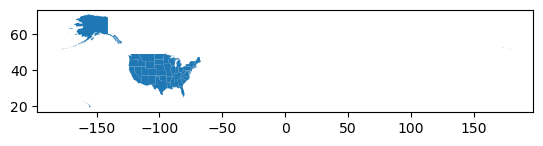

In [93]:
#view merged DF
merged_FINAL.plot()

In [110]:
!pip install mapclassify

# Add the data for the interactive choropleth
m= merged_FINAL.explore(
    # Make choropleth based on Total Electric Stations Per State
    column="Total Electric Stations Per State",  
    
    # Use mapclassify's natural breaks scheme
    scheme="naturalbreaks",
    
    # Show legend
    legend=True,  
    
    # Use 8 bins
    k=8, 
    
    # Hide tooltip because we added a pop up below that will make the user click to see state and station info
    tooltip=False, 
    
    # Pop up on click to show state's station counts  
    popup=["NAME", "Level 1 Stations", "Level 2 Stations", "Level 3 Stations"], 
    
     # do not use colorbar
    legend_kwds=dict(colorbar=False), 
     
 
)

C:\Users\Lenovo\Anaconda3Path\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [109]:
#save as html file
m.save('Final_Electric_Station_Map.html')